### **Projeto 5: Simulação de Estratégias de Investimento e Análise de Risco Integrada**

**Objetivo:** Simular e comparar o desempenho histórico e o perfil de risco de uma carteira otimizada pela teoria de Markowitz contra benchmarks (carteira de pesos iguais e Ibovespa), gerando um relatório conclusivo.

--- Inicializando o ambiente ---
Bibliotecas carregadas com sucesso.

--- PASSO 1: Coletando e preparando os dados históricos ---


/tmp/ipython-input-1-956366072.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_precos = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  6 of 6 completed


Dados coletados para 5 ativos mais o Ibovespa.
Período da análise: de 2020-01-03 a 2025-06-26.

--- PASSO 2: Otimizando a carteira para Máximo Índice de Sharpe ---
Pesos da Carteira Otimizada (Máximo Sharpe):
  - ELET3.SA: 1.56%
  - ITUB4.SA: 5.49%
  - LREN3.SA: 4.86%
  - VALE3.SA: 5.07%
  - WEGE3.SA: 83.02%


--- PASSO 3: Simulando o desempenho histórico das estratégias ---
Simulação de desempenho concluída.

--- PASSO 4: Analisando as métricas de Risco e Retorno ---
--- PASSO 5: Relatório Final e Visualização ---

**Tabela Comparativa de Desempenho e Risco:**

                       Métrica Carteira Otimizada (Markowitz) Carteira com Pesos Iguais
            Retorno Anualizado                         14.49%                     2.01%
    Volatilidade (Risco) Anual                         33.74%                    28.12%
              Índice de Sharpe                           0.13                     -0.28
Value at Risk (VaR 95%, 1 dia)                         -2.96%                  

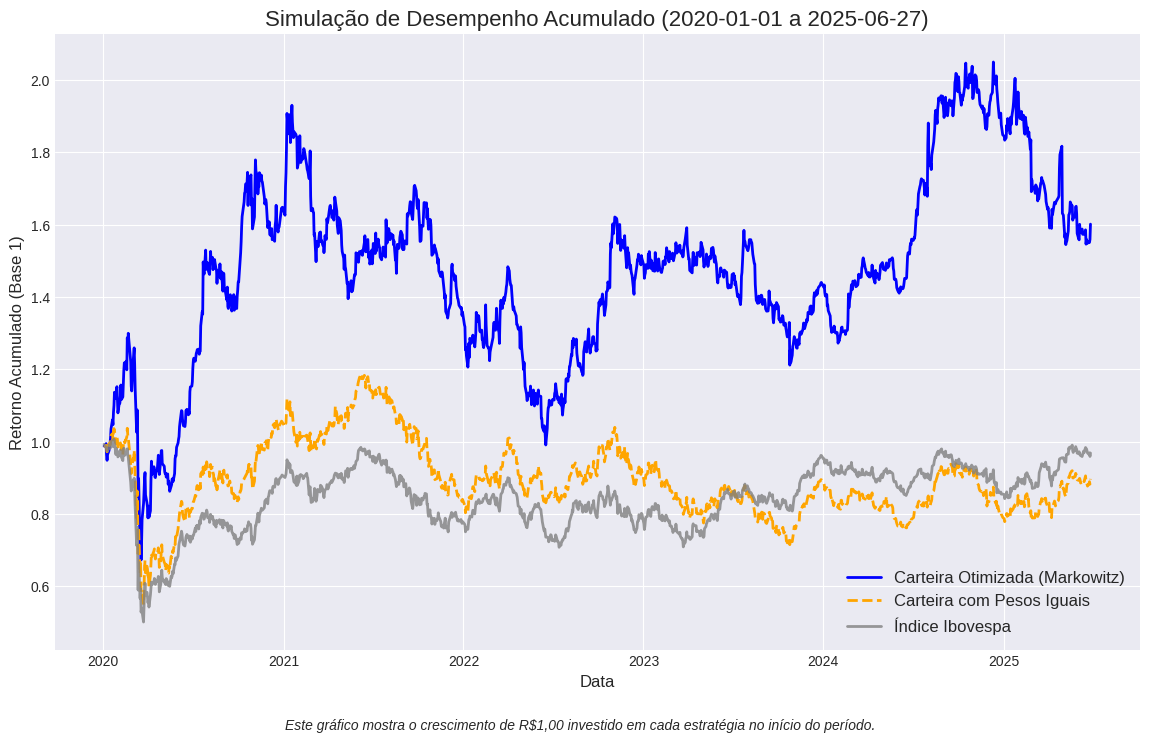

In [ ]:
# ==============================================================================
# PROJETO: SIMULAÇÃO DE ESTRATÉGIAS DE INVESTIMENTO E ANÁLISE INTEGRADA
# ==============================================================================

# PASSO 0: INSTALAÇÃO E IMPORTAÇÃO DAS BIBLIOTECAS
print("--- Inicializando o ambiente ---")
!pip install yfinance pandas numpy matplotlib seaborn -q

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas carregadas com sucesso.\n")


# ==============================================================================
# PASSO 1: COLETA E PREPARAÇÃO DOS DADOS
# ==============================================================================
print("--- PASSO 1: Coletando e preparando os dados históricos ---")

# Selecionando ativos de setores diversos para uma boa diversificação
# Mineração, Bancos, Indústria, Varejo, Elétrico + Ibovespa como benchmark
tickers = ['VALE3.SA', 'ITUB4.SA', 'WEGE3.SA', 'LREN3.SA', 'ELET3.SA', '^BVSP']
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d') # Data de hoje

# Baixando os preços de fechamento
dados_precos = yf.download(tickers, start=start_date, end=end_date)['Close']
dados_precos.rename(columns={'^BVSP': 'IBOV'}, inplace=True)
dados_precos.dropna(inplace=True)

# Calculando os retornos diários logarítmicos
retornos = np.log(dados_precos / dados_precos.shift(1)).dropna()

# Separando os retornos dos ativos e do Ibovespa
retornos_ativos = retornos.drop(columns=['IBOV'])
retornos_ibov = retornos['IBOV']
ativos = retornos_ativos.columns

print(f"Dados coletados para {len(ativos)} ativos mais o Ibovespa.")
print(f"Período da análise: de {retornos.index[0].date()} a {retornos.index[-1].date()}.\n")


# ==============================================================================
# PASSO 2: OTIMIZAÇÃO DA CARTEIRA (MÉTODO DE MARKOWITZ)
# ==============================================================================
print("--- PASSO 2: Otimizando a carteira para Máximo Índice de Sharpe ---")

# Cálculos anuais de retorno e risco
retorno_medio_anual = retornos_ativos.mean() * 252
matriz_cov_anual = retornos_ativos.cov() * 252
taxa_livre_risco = 0.10  # Taxa Selic aproximada para o cálculo do Sharpe

# Simulação de Monte Carlo para encontrar a carteira ótima
num_carteiras = 20000
resultados_carteiras = np.zeros((3, num_carteiras))
pesos_carteiras_lista = []

for i in range(num_carteiras):
    pesos = np.random.random(len(ativos))
    pesos /= np.sum(pesos)
    pesos_carteiras_lista.append(pesos)

    retorno_carteira = np.sum(retorno_medio_anual * pesos)
    volatilidade_carteira = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov_anual, pesos)))

    resultados_carteiras[0,i] = retorno_carteira
    resultados_carteiras[1,i] = volatilidade_carteira
    resultados_carteiras[2,i] = (retorno_carteira - taxa_livre_risco) / volatilidade_carteira

# Identificando a carteira com o maior Índice de Sharpe
max_sharpe_idx = np.argmax(resultados_carteiras[2])
pesos_otimos = pesos_carteiras_lista[max_sharpe_idx]

print("Pesos da Carteira Otimizada (Máximo Sharpe):")
for ticker, peso in zip(ativos, pesos_otimos):
    print(f"  - {ticker}: {peso:.2%}")
print("\n")


# ==============================================================================
# PASSO 3: SIMULAÇÃO DO DESEMPENHO HISTÓRICO (BACKTESTING)
# ==============================================================================
print("--- PASSO 3: Simulando o desempenho histórico das estratégias ---")

# Definindo a carteira de referência com pesos iguais
pesos_iguais = np.array([1/len(ativos)] * len(ativos))

# Calculando os retornos diários de cada estratégia
retornos_carteira_otimizada = retornos_ativos.dot(pesos_otimos)
retornos_carteira_iguais = retornos_ativos.dot(pesos_iguais)

# Calculando o retorno acumulado para visualização
# (Como um investimento de R$1,00 teria crescido)
retorno_acumulado_otimizado = (1 + retornos_carteira_otimizada).cumprod()
retorno_acumulado_iguais = (1 + retornos_carteira_iguais).cumprod()
retorno_acumulado_ibov = (1 + retornos_ibov).cumprod()

print("Simulação de desempenho concluída.\n")


# ==============================================================================
# PASSO 4: CÁLCULO E ANÁLISE INTEGRADA DE RISCO
# ==============================================================================
print("--- PASSO 4: Analisando as métricas de Risco e Retorno ---")

# Função para calcular as métricas e evitar repetição de código
def calcular_metricas(retornos_da_carteira, taxa_livre_risco):
    retorno_anual = retornos_da_carteira.mean() * 252
    volatilidade_anual = retornos_da_carteira.std() * np.sqrt(252)
    sharpe_ratio = (retorno_anual - taxa_livre_risco) / volatilidade_anual
    var_95 = np.percentile(retornos_da_carteira, 5) # VaR Histórico 95% para 1 dia
    return retorno_anual, volatilidade_anual, sharpe_ratio, var_95

# Calculando as métricas para as duas estratégias
retorno_otim, vol_otim, sharpe_otim, var_otim = calcular_metricas(retornos_carteira_otimizada, taxa_livre_risco)
retorno_igu, vol_igu, sharpe_igu, var_igu = calcular_metricas(retornos_carteira_iguais, taxa_livre_risco)

# Organizando os resultados em um DataFrame para comparação
relatorio_final = pd.DataFrame({
    "Métrica": [
        "Retorno Anualizado",
        "Volatilidade (Risco) Anual",
        "Índice de Sharpe",
        "Value at Risk (VaR 95%, 1 dia)"
    ],
    "Carteira Otimizada (Markowitz)": [
        f"{retorno_otim:.2%}",
        f"{vol_otim:.2%}",
        f"{sharpe_otim:.2f}",
        f"{var_otim:.2%}"
    ],
    "Carteira com Pesos Iguais": [
        f"{retorno_igu:.2%}",
        f"{vol_igu:.2%}",
        f"{sharpe_igu:.2f}",
        f"{var_igu:.2%}"
    ]
})


# ==============================================================================
# PASSO 5: RELATÓRIOS E VISUALIZAÇÃO
# ==============================================================================
print("--- PASSO 5: Relatório Final e Visualização ---")

print("\n**Tabela Comparativa de Desempenho e Risco:**\n")
print(relatorio_final.to_string(index=False))

print("\n\n--- Conclusão da Análise ---")
print("A simulação histórica mostra o desempenho de cada estratégia.")
print(f"A carteira otimizada alcançou um Índice de Sharpe de {sharpe_otim:.2f}, superior ao da carteira de pesos iguais ({sharpe_igu:.2f}).")
print("Isso indica que a estratégia de Markowitz gerou um melhor retorno para cada unidade de risco assumido durante o período analisado.")
print(f"Em termos de risco de cauda, a perda diária máxima potencial (VaR 95%) da carteira otimizada foi de {var_otim:.2%}, "
      f"enquanto a da carteira de pesos iguais foi de {var_igu:.2%}.")
print("A visualização do retorno acumulado ilustra a trajetória do capital em cada estratégia.")


# Plot do desempenho acumulado
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))

plt.plot(retorno_acumulado_otimizado.index, retorno_acumulado_otimizado, label='Carteira Otimizada (Markowitz)', color='blue', linewidth=2)
plt.plot(retorno_acumulado_iguais.index, retorno_acumulado_iguais, label='Carteira com Pesos Iguais', color='orange', linestyle='--', linewidth=2)
plt.plot(retorno_acumulado_ibov.index, retorno_acumulado_ibov, label='Índice Ibovespa', color='grey', alpha=0.8, linewidth=2)

plt.title(f'Simulação de Desempenho Acumulado ({start_date} a {end_date})', fontsize=16)
plt.ylabel('Retorno Acumulado (Base 1)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend(fontsize=12)
plt.figtext(0.5, 0.01, 'Este gráfico mostra o crescimento de R$1,00 investido em cada estratégia no início do período.', ha='center', fontsize=10, style='italic')

plt.show()